## Tree-based Methods in Machine Learning

**Machine Learning Module in Python**

**&copy; Kaixin Wang**, Winter 2020

## Data Preprocessing

### Libraries Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# handling warning messages:
import warnings
warnings.filterwarnings('ignore')

### Data Import

In [3]:
# read in the csv file
train = pd.read_csv("football_train.csv", index_col = 0)

In [4]:
# check if the file has been correctly read in
train.head()

,Yards,OffensivePlays,TurnOversLost,FumblesLost,FirstDowns,PassesCompleted,PassesAttempted,YardsGainedPassing,InterceptionsThrown,RushingAttempts,...,OppPassesAttempted,OppYardsGainedPassing,OppInterceptionsThrown,OppRushingAttempts,OppYardsGainedRushing,OppPenaltiesCommitedByTeam,OppPenaltiesInYards,OppFirstDownsByPenalty,OppNumberOfDrives,Wins
ID,,,,,,,,,,,,,,,,,,,,,
1,5340,1000,31,11,275,298,519,3340,20,437,...,549,4092,9,442,1727,87,686,28,189,4
2,6138,1014,25,14,342,328,476,3784,11,508,...,558,4031,18,392,1650,104,861,34,179,12
3,5362,955,19,13,288,306,494,3361,6,431,...,521,3216,19,444,2107,79,676,18,177,10
4,5728,1004,17,8,324,334,505,3923,9,467,...,646,3976,21,344,1477,116,1063,31,180,12
5,4788,994,26,9,269,328,586,3419,17,358,...,535,3832,12,545,2256,101,820,37,191,2


In [5]:
train.shape

(380, 31)

In [6]:
# standardize the numeric columns
n = train.shape[1]
for i in range(n - 1):
    train.iloc[:, i] = (train.iloc[:, i] - np.mean(train.iloc[:, i])) / np.std(train.iloc[:, i])

In [7]:
train.head()

,Yards,OffensivePlays,TurnOversLost,FumblesLost,FirstDowns,PassesCompleted,PassesAttempted,YardsGainedPassing,InterceptionsThrown,RushingAttempts,...,OppPassesAttempted,OppYardsGainedPassing,OppInterceptionsThrown,OppRushingAttempts,OppYardsGainedRushing,OppPenaltiesCommitedByTeam,OppPenaltiesInYards,OppFirstDownsByPenalty,OppNumberOfDrives,Wins
ID,,,,,,,,,,,,,,,,,,,,,
1,-0.067486,-0.275791,0.797903,0.138608,-0.874948,-0.619963,-0.305416,-0.325343,1.009883,-0.041968,...,0.178948,1.276131,-1.386068,0.172824,-0.262938,-1.136733,-1.345573,0.161351,0.268029,4
2,1.198873,0.018357,-0.084356,0.965899,0.907859,-0.009847,-1.013489,0.384790,-0.836082,1.296434,...,0.382406,1.132749,0.485370,-0.909461,-0.521518,0.077035,0.009290,0.978862,-0.740398,12
3,-0.032574,-1.221267,-0.966615,0.690135,-0.529030,-0.457266,-0.717086,-0.291755,-1.861618,-0.155072,...,-0.454033,-0.782929,0.693308,0.216115,1.013175,-1.707917,-1.422994,-1.201168,-0.942083,10
4,0.548237,-0.191749,-1.260702,-0.688684,0.428896,0.112176,-0.535951,0.607106,-1.246296,0.523554,...,2.371773,1.003470,1.109183,-1.948455,-1.102485,0.933812,1.573190,0.570106,-0.639555,12
5,-0.943463,-0.401855,0.062687,-0.412920,-1.034602,-0.009847,0.797860,-0.198990,0.394561,-1.531175,...,-0.137542,0.664994,-0.762256,2.402332,1.513546,-0.137159,-0.308135,1.387617,0.469715,2


### Correlation matrix and correlation heatmap

In [8]:
train.corr().iloc[:, n-1] 

Yards                         0.545436
OffensivePlays                0.275029
TurnOversLost                -0.531927
FumblesLost                  -0.329564
FirstDowns                    0.527665
PassesCompleted               0.141868
PassesAttempted              -0.091427
YardsGainedPassing            0.363565
InterceptionsThrown          -0.496850
RushingAttempts               0.449488
YardsGainedRushing            0.342025
PenaltiesCommitedByTeam      -0.171125
PenaltiesInYards             -0.138735
FirstDownsByPenalty           0.172522
NumberOfDrives               -0.126591
OppYards                     -0.361141
OppOffensivePlays            -0.214024
OppTurnOversLost              0.441954
OppFumblesLost                0.194505
OppFirstDowns                -0.307572
OppPassesCompleted            0.090255
OppPassesAttempted            0.367913
OppYardsGainedPassing        -0.117004
OppInterceptionsThrown        0.452108
OppRushingAttempts           -0.631873
OppYardsGainedRushing    

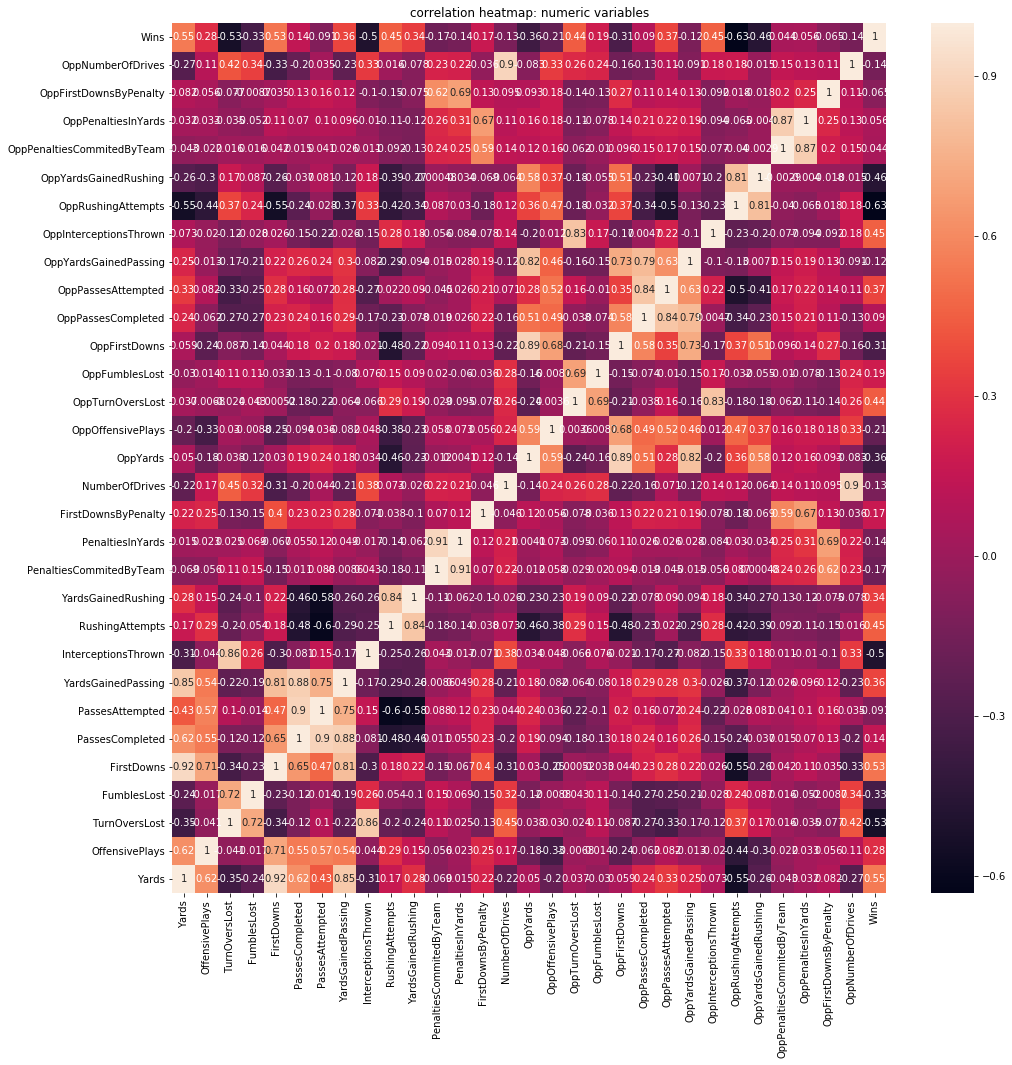

In [9]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr(), annot = True)
plt.xlim([0, n])
plt.ylim([0, n])
plt.title("correlation heatmap: numeric variables")
plt.show()

In [10]:
indices = []
for i in range(n-1):
    if (abs(train.corr().iloc[:, n-1]) > 0.35)[i]:
        indices.append(i)

## Tree-Based Methods

Suppose that we want to predict the variable `Wins` of each team based on the predictors in the dataframe.

We can choose to use the entire dataset as the testing set, but we then cannot have a measure of how good predictions the model can make on future/unseen data.

Therefore, to enhance the predictive ability of the model, we apply cross-validation (cv) method to build four different types of tree-based methods:

- Decision tree model
- Random Forest model
- Boosting models:
    - XGBoost model
    - LightGBM model

Split the dataset into X (features) and y (label)

In [11]:
# training set
X = train.iloc[:, range(0, n-1)]
y = train.iloc[:, n-1]

Import the true testing dataset and split it into X (features) and y (label)

In [12]:
# true test set
test_x = pd.read_csv("football_test.csv", index_col = 0)
test_y = pd.read_csv("football_answers.csv")
test_y = test_y.loc[:, "Wins"]
test_x.columns = X.columns

Standardize the features

In [13]:
# standardize the features
n = test_x.shape[1]
for i in range(n - 1):
    test_x.iloc[:, i] = (test_x.iloc[:, i] - np.mean(test_x.iloc[:, i])) / np.std(test_x.iloc[:, i])

For consistency, we fix the maximum depth (`max_depth`) of the tree to be 3.

### Regression Trees 

#### Regression Trees

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
from sklearn.tree import DecisionTreeRegressor

Parameters in Regression Tree model:

- `max_features`: the number of features to consider when looking for the best split
- `random_state`: the seed used by the random number generator

In [16]:
parameters = {'max_features':list(range(1, len(indices) + 5)), 'random_state':[7, 17, 42]}
tree_model = DecisionTreeRegressor(max_depth = 3)
cv_tree = GridSearchCV(tree_model, parameters)
cv_tree.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=3,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16],
                         'random_state': [7, 17, 42]},
             pr

Find the best set of parameters

In [17]:
cv_tree.best_params_

{'max_features': 3, 'random_state': 17}

Data structures to store the predictions on the trainset and testset

In [18]:
trainset = {}
testset = {}

Data structures to store the error of predictions on the trainset and testset

In [19]:
error_train = {}
error_test = {}

In [20]:
trainset['regression tree'] = cv_tree.predict(X)
testset['regression tree']  = cv_tree.predict(test_x)

Error of predictions used = RMSE

In [21]:
error_train['regression tree'] = np.sqrt(sum((trainset['regression tree'] - y) ** 2) / len(y))
error_test['regression tree'] = np.sqrt((sum(testset['regression tree'] - test_y) ** 2) / len(test_y))

### Bagging-based Trees
- Random Forest

Suppose we fix the maximum depth (`max_depth`) of the tree to be 3 for consistency.

In [22]:
from sklearn.ensemble import RandomForestRegressor

Parameters in Random Forest model:

- `max_features`: the number of features to consider when looking for the best split
- `random_state`: the seed used by the random number generator

In [23]:
parameters = {'max_features':list(range(1, len(indices) + 5)), 'random_state':[7, 17, 42]}
rf_model = RandomForestRegressor(max_depth = 3)
cv_rf = GridSearchCV(rf_model, parameters)
cv_rf.fit(X, y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=3, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                  

In [24]:
cv_rf.best_params_

{'max_features': 13, 'random_state': 7}

In [25]:
trainset['Random Forest'] = cv_rf.predict(X)
testset['Random Forest']  = cv_rf.predict(test_x)

In [26]:
error_train['Random Forest'] = np.sqrt(sum((trainset['Random Forest'] - y) ** 2) / len(y))
error_test['Random Forest'] = np.sqrt(sum((testset['Random Forest'] - test_y) ** 2) / len(test_y))

### Boosting-based Trees
- XGBoost model
- LightGBM model

#### XGBoost model

In [27]:
import xgboost as xgb

Parameters in XGBoost model:

- `max_depth`: the maximum tree depth for base learners
- `learning_rate`: boosting learning rate (xgb's "eta")
- `max_features`: the number of features to consider when looking for the best split
- `n_estimators`:  the number of trees to fit
- `seed`: the seed used by the random number generator

In [28]:
parameters = {'objective':["reg:squarederror"], 'max_iter':list(range(10, 51, 10)), 'seed': [7, 17, 42], 
              'max_depth':[3], 'learning_rate':list(np.arange(0.1, 1.5, 0.2)), 'n_estimators':list(range(10, 100, 10))}
xgb_model = xgb.XGBRegressor()
cv_xgb = GridSearchCV(xgb_model, parameters)
cv_xgb.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_sta...
             param_grid={'learning_rate': [0.1, 0.30000000000000004,
                                           0.5000000000000001,
                                           0.7000000000000001,
                                           0.9000000000000001,
                                           1.1000000000000003,
                                          

In [29]:
cv_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_iter': 10,
 'n_estimators': 80,
 'objective': 'reg:squarederror',
 'seed': 7}

In [30]:
trainset['xgboost'] = cv_xgb.predict(X)
testset['xgboost']  = cv_xgb.predict(test_x)

In [31]:
error_train['xgboost'] = np.sqrt(sum((trainset['xgboost'] - y) ** 2)/ len(y))
error_test['xgboost'] = np.sqrt(sum((testset['xgboost'] - test_y) ** 2) / len(test_y))

#### LightGBM model

In [32]:
import lightgbm as lgb

Parameters in LightGBM model:

- `n_estimators`: the number of boosted trees to fit
- `learning_rate`: the boosting learning rate
- `importance_type`: the type of feature importance (split or gain)
- `random_state`: the random number seed

In [33]:
lgb_model = lgb.LGBMRegressor(objective = 'regression', max_depth = 3)
parameters = {'learning_rate':list(np.arange(0.1, 1.5, 0.3)), 
              'importance_type':['split','gain'], 
              'n_estimators':list(range(10, 100, 20)), 
              'random_state':[7, 42]}
cv_lgb = GridSearchCV(lgb_model, parameters)
cv_lgb.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=3, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective='regression', random_state=None,
                                     reg_alpha=0....e,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'importance_type': ['split', 'gain'],
                         'learning_rate': [0.1, 0.4, 0.7000000000000001,
                                           1.000

In [34]:
cv_lgb.best_params_

{'importance_type': 'split',
 'learning_rate': 0.1,
 'n_estimators': 90,
 'random_state': 7}

In [35]:
trainset['lightgbm'] = cv_lgb.predict(X)
testset['lightgbm']  = cv_lgb.predict(test_x)

In [36]:
error_train['lightgbm'] = np.sqrt(sum((trainset['lightgbm'] - y) ** 2) / len(y))
error_test['lightgbm'] = np.sqrt(sum((testset['lightgbm'] - test_y) ** 2) / len(test_y))

### Comparison of the trees

#### Calculate the amount of variance in each type of tree

In [37]:
variances_train = {key:np.var(trainset[key]) for key in trainset.keys()}
variances_test = {key:np.var(testset[key]) for key in testset.keys()}

#### Calculate the average amount of bias in each type of tree

In [38]:
biases_train = {key:np.mean(np.abs(value - y)) for key, value in trainset.items()}
biases_test = {key:np.mean(np.abs(value - test_y)) for key, value in testset.items()}

#### Plot  predictions vs. true values

In [39]:
colors = {1:"blue", 2:"red", 3:"orange", 4:"pink"}

#### Training set

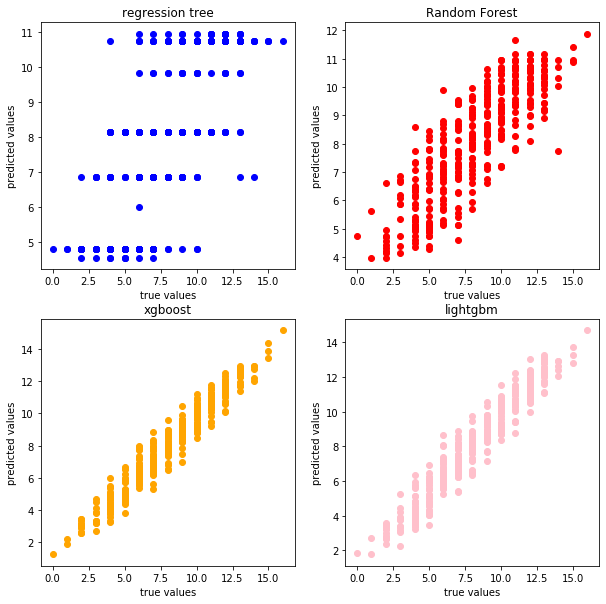

In [40]:
plt.figure(figsize = (10, 10))
i = 1
for key, value in trainset.items():
    plt.subplot(2, 2, i)
    plt.scatter(y, value, color = colors[i])
    plt.xlabel("true values")
    plt.ylabel("predicted values")
    plt.title(key)
    i += 1
plt.show()

Based on predictions vs. true values on the training set, we observe the boosting trees, xgboost and lightgbm perform relatively a lot better than the classic regression tree and random forest models.

#### Testing set

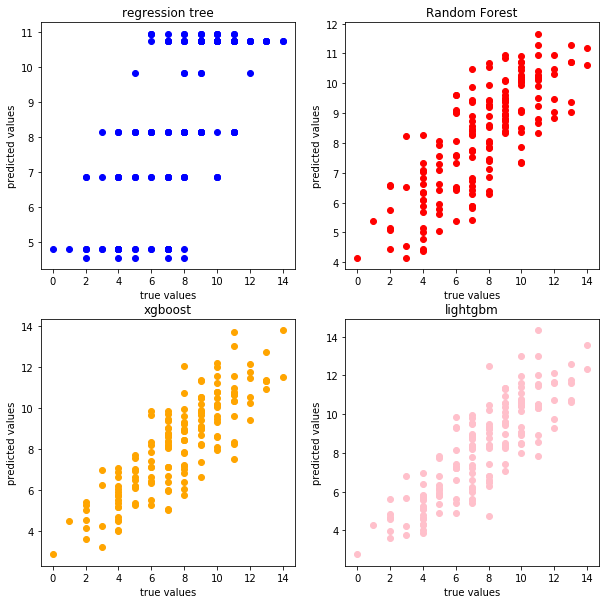

In [41]:
plt.figure(figsize = (10, 10))
i = 1
for key, value in testset.items():
    plt.subplot(2, 2, i)
    plt.scatter(test_y, value, color = colors[i])
    plt.xlabel("true values")
    plt.ylabel("predicted values")
    plt.title(key)
    i += 1
plt.show()

Based on predictions vs. true values on the testing set, we observe the boosting trees, xgboost and lightgbm also perform relatively a lot better than the classic regression tree and random forest models, although the predicting performance on the testing set across all four models are not as good as on the training set.

#### Change in bias and change in variance

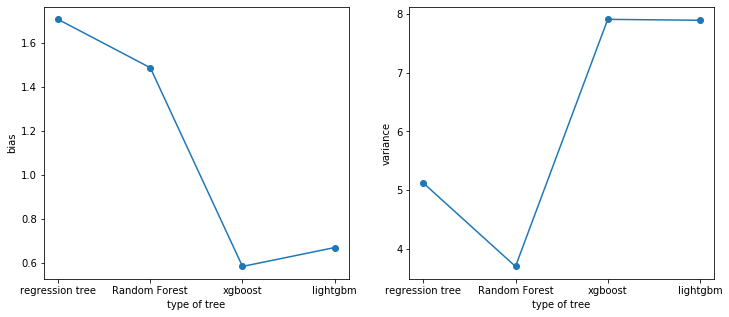

In [42]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(list(biases_train.keys()), list(biases_train.values()), "-o")
plt.xlabel("type of tree")
plt.ylabel("bias")
plt.subplot(1, 2, 2)
plt.plot(list(variances_train.keys()), list(variances_train.values()), "-o")
plt.xlabel("type of tree")
plt.ylabel("variance")
plt.show()

#### Bias vs. Variance

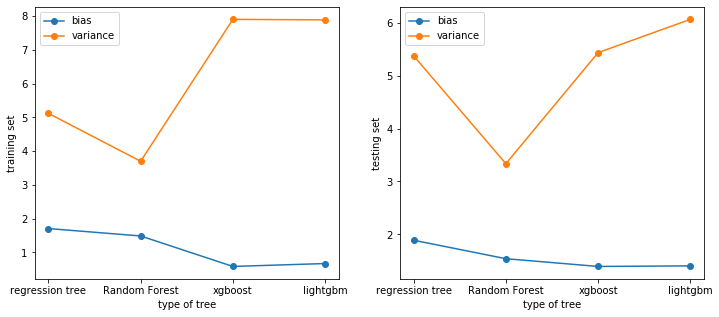

In [43]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(list(biases_train.keys()), list(biases_train.values()), "-o")
plt.plot(list(variances_train.keys()), list(variances_train.values()), "-o")
plt.xlabel("type of tree")
plt.ylabel("training set")
plt.legend(["bias", "variance"])
plt.subplot(1, 2, 2)
plt.plot(list(biases_test.keys()), list(biases_test.values()), "-o")
plt.plot(list(variances_test.keys()), list(variances_test.values()), "-o")
plt.xlabel("type of tree")
plt.ylabel("testing set")
plt.legend(["bias", "variance"])
plt.show()

Based on the plot of the biases and variances:

- the xgboost and lightgbm models have low biases but high variances
- the classic regression tree and random forest models have high biases but low variances

This align with that fact the two boosting methods have higher complexity level than the classic tree methods.

#### Bias,  Variance and RMSE

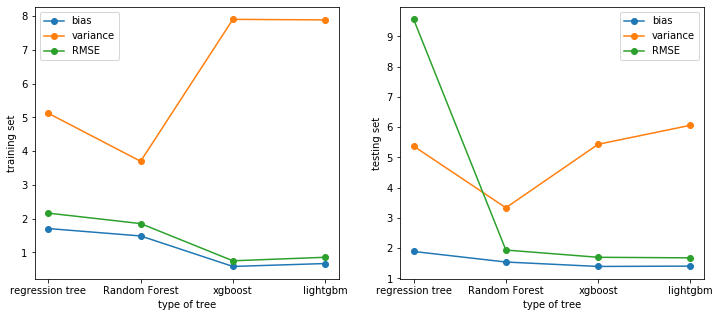

In [44]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(list(biases_train.keys()), list(biases_train.values()), "-o")
plt.plot(list(variances_train.keys()), list(variances_train.values()), "-o")
plt.plot(list(error_train.keys()), list(error_train.values()), "-o")
plt.xlabel("type of tree")
plt.ylabel("training set")
plt.legend(["bias", "variance", "RMSE"])
plt.subplot(1, 2, 2)
plt.plot(list(biases_test.keys()), list(biases_test.values()), "-o")
plt.plot(list(variances_test.keys()), list(variances_test.values()), "-o")
plt.plot(list(error_test.keys()), list(error_test.values()), "-o")
plt.xlabel("type of tree")
plt.ylabel("testing set")
plt.legend(["bias", "variance", "RMSE"])
plt.show()

Comparing four tree-based models:

- in terms of bias of predictions, boosting methods have lower bias than the classic tree methods
- in terms of variance of predictions, classic tree methods have lower variances than the boosting tree methods

Overall speaking, among all four models, the **random forest** model is the one that has a good **balance** between bias and variance. It has the most suitable level of complexity in this specific prediction problem.

#### Upcoming: Learning curve in each model

In [45]:
from sklearn.model_selection import learning_curve

In [46]:
samples = {}
train_scores = {}
test_scores = {}

In [47]:
train_scores_mean = {}
train_scores_std = {}
test_scores_mean = {}
test_scores_std = {}

Upcoming module:

### Evaluation Criteria

- MSE and RMSE
- $R^2$ and $R^2_{\text{adj}}$
- AIC, BIC and $C_p$

**&copy; Kaixin Wang**, updated February 2020